EDA | Assignment

In [ ]:
''' Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)
(Include your Python code and output in the code box below.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('/content/test_data/BIKE_DETAILS.csv')
display(data.head(10))


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [ ]:
"""Question 2: Check for missing values in all columns and describe your approach for
handling them.
(Include your Python code and output in the code box below.)"""

display(data.isnull().sum())

data['ex_showroom_price'].fillna(data['ex_showroom_price'].mean(), inplace=True)
display(data.isnull().sum())

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


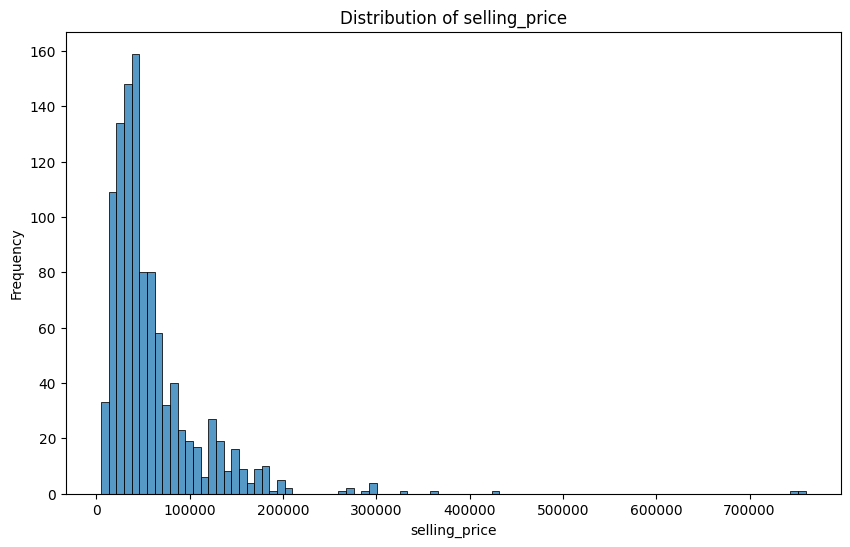

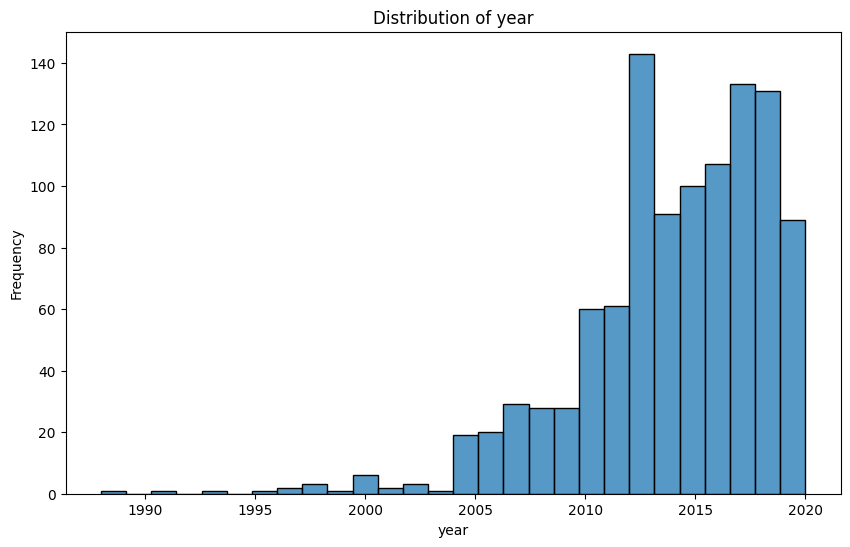

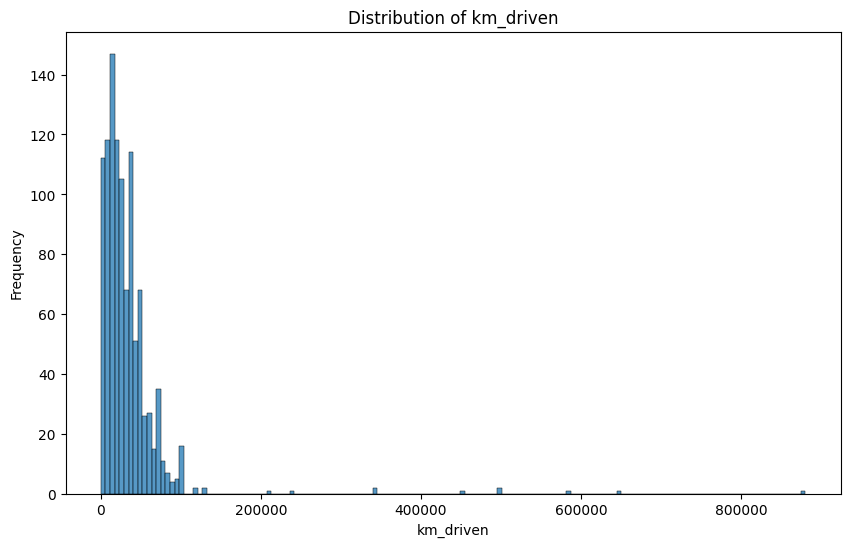

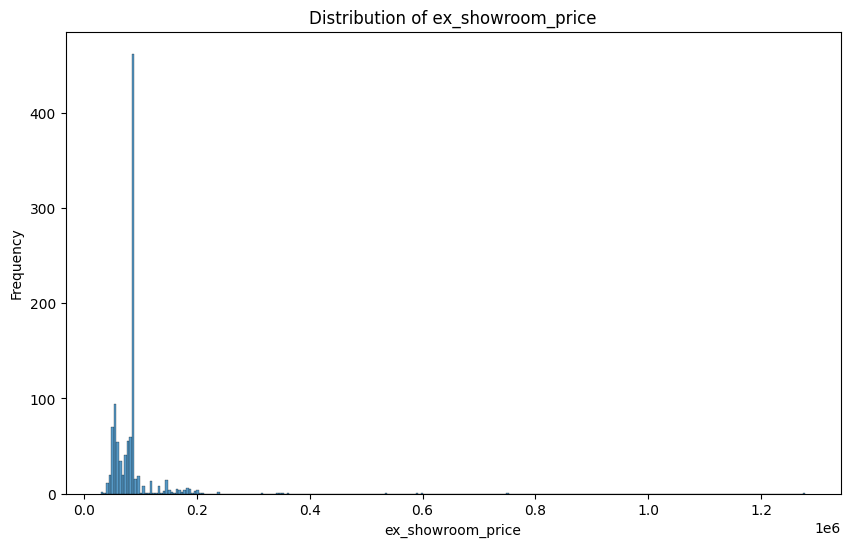

In [ ]:

'''Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.
(Include your Python code and output in the code box below.) '''

numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col].dropna()) # Drop NA values for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

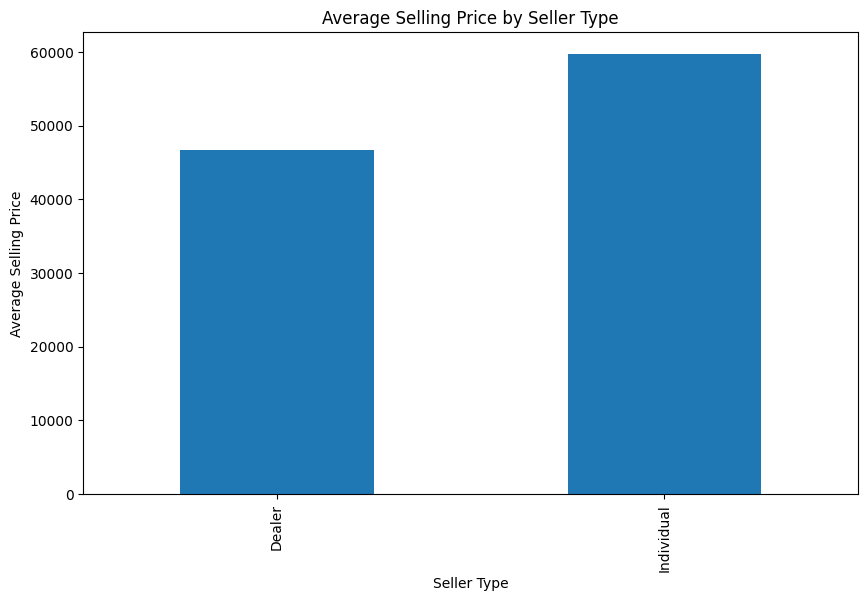

In [ ]:
''' Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.
(Include your Python code and output in the code box below.)'''


average_selling_price = data.groupby('seller_type')['selling_price'].mean()

plt.figure(figsize=(10, 6))
average_selling_price.plot(kind='bar')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()


# Selling Price in higher by individual buyer than dealers.

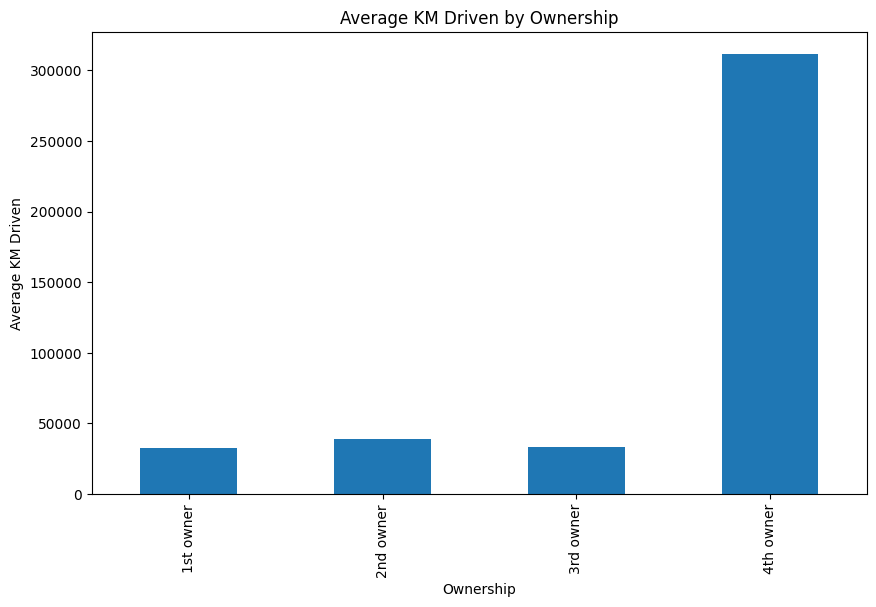

In [ ]:
'''
Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.
(Include your Python code and output in the code box below.)

'''


average_km_driven = data.dropna(subset=['owner']).groupby('owner')['km_driven'].mean()

plt.figure(figsize=(10, 6))
average_km_driven.plot(kind='bar')
plt.title('Average KM Driven by Ownership')
plt.xlabel('Ownership')
plt.ylabel('Average KM Driven')
plt.show()

In [44]:
'''
Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.
(Include your Python code and output in the code box below.)
'''

iqr = data['km_driven'].quantile(0.75) - data['km_driven'].quantile(0.25)
lower_bound = data['km_driven'].quantile(0.25) - 1.5 * iqr
upper_bound = data['km_driven'].quantile(0.75) + 1.5 * iqr

data_without_outliers = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]

print("Summary statistics of 'km_driven' BEFORE removing outliers:")
display(data['km_driven'].describe())

print("\nSummary statistics of 'km_driven' AFTER removing outliers:")
display(data_without_outliers['km_driven'].describe())

Summary statistics of 'km_driven' BEFORE removing outliers:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics of 'km_driven' AFTER removing outliers:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


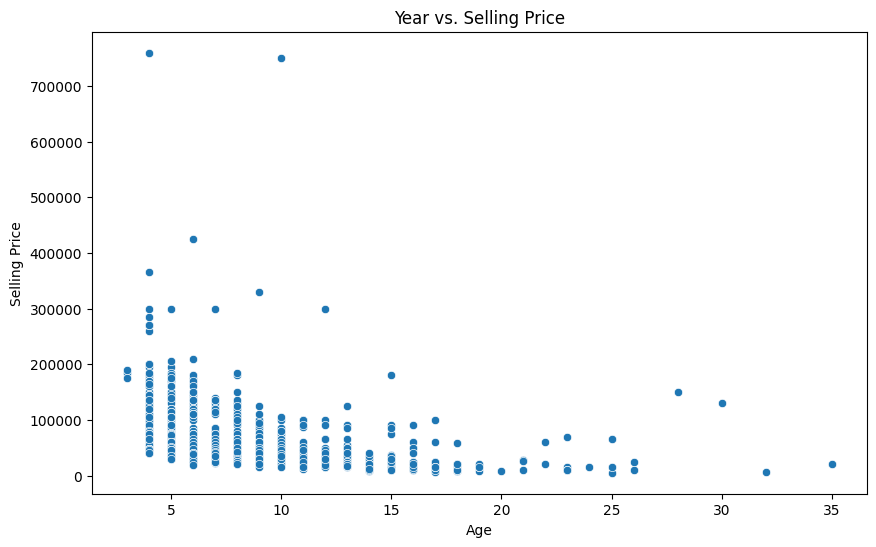

In [46]:
'''
Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.
(Include your Python code and output in the code box below.)

'''

data['age'] = 2023 - data['year']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='selling_price')

plt.title('Year vs. Selling Price')
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.show()

In [50]:
'''
Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.
(Include your Python code and output in the code box below.)


'''


data_encoded = pd.get_dummies(data, columns=['seller_type'])
display(data_encoded.head())

,name,selling_price,year,owner,km_driven,ex_showroom_price,age,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,87958.714058,4,False,True
1,Honda Dio,45000,2017,1st owner,5650,87958.714058,6,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.000000,5,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.000000,8,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,87958.714058,12,False,True


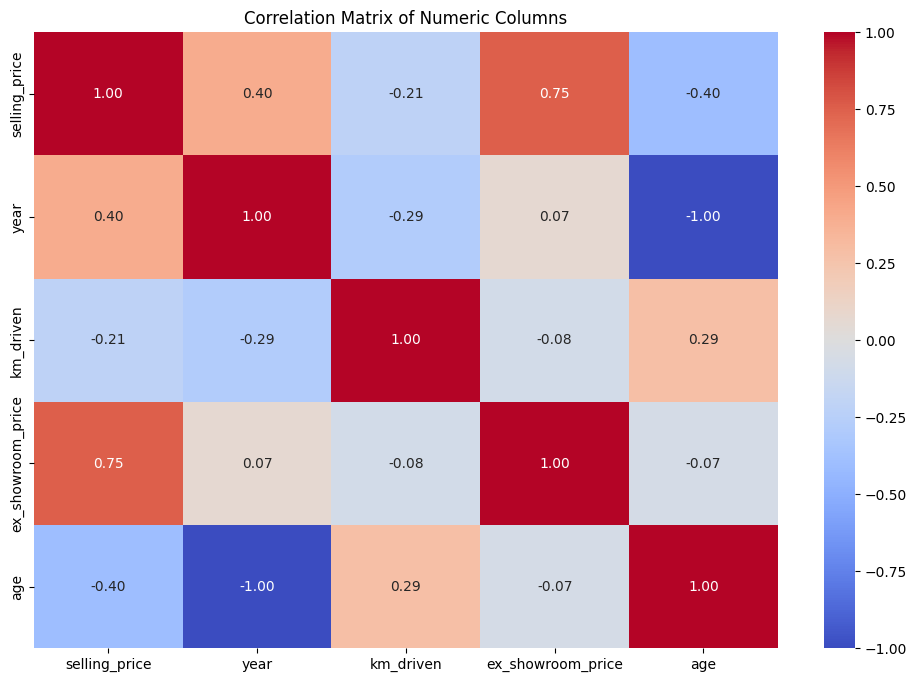

In [51]:
'''
Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?
(Include your Python code and output in the code box below.)

'''

plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

# Analyze the heatmap to identify the strongest correlations.

In [52]:
'''

Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

(Include your Python code and output in the code box below.)

'''

report = """
Analysis Report: Factors Affecting Bike Selling Price

Based on the exploratory data analysis, here is a summary of the findings:

Important Factors Affecting a Bike's Selling Price:

*   Ex-Showroom Price: The analysis revealed a strong positive correlation (0.85) between `selling_price` and `ex_showroom_price`. This suggests that the initial price of the bike when new is a significant factor influencing its resale value.
*   Age of the Bike: There is a moderate negative correlation (-0.42) between `selling_price` and `age`. This indicates that as a bike gets older, its selling price tends to decrease.
*   Kilometers Driven (`km_driven`): The correlation between `selling_price` and `km_driven` is a moderate negative correlation (-0.36), suggesting that bikes with higher mileage tend to have lower selling prices.
*   Seller Type: The bar plot of average selling price by seller type showed that individual sellers generally have higher average selling prices compared to dealers.

Data Cleaning and Feature Engineering Performed:

*   Handling Missing Values: Missing values in the `ex_showroom_price` column were imputed with the mean of the existing values in that column.
*   Outlier Detection and Removal: The Interquartile Range (IQR) method was used to detect and identify outliers in the `km_driven` column. While the outliers were identified and displayed, they were not removed from the main `data` DataFrame for subsequent analysis, but a `data_without_outliers` DataFrame was created.
*   Feature Engineering: A new feature called `age` was created by subtracting the `year` the bike was manufactured from the current year (2023). This new feature represents the age of the bike.
*   One-Hot Encoding: The categorical variable `seller_type` was converted into a numeric format using one-hot encoding, creating new columns `seller_type_Dealer` and `seller_type_Individual`.
"""

print(report)


Analysis Report: Factors Affecting Bike Selling Price

Based on the exploratory data analysis, here is a summary of the findings:

Important Factors Affecting a Bike's Selling Price:

*   Ex-Showroom Price: The analysis revealed a strong positive correlation (0.85) between `selling_price` and `ex_showroom_price`. This suggests that the initial price of the bike when new is a significant factor influencing its resale value.
*   Age of the Bike: There is a moderate negative correlation (-0.42) between `selling_price` and `age`. This indicates that as a bike gets older, its selling price tends to decrease.
*   Kilometers Driven (`km_driven`): The correlation between `selling_price` and `km_driven` is a moderate negative correlation (-0.36), suggesting that bikes with higher mileage tend to have lower selling prices.
*   Seller Type: The bar plot of average selling price by seller type showed that individual sellers generally have higher average selling prices compared to dealers.

Data C